In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.ensemble import ExtreesRegressor
data = pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [16]:
data = data.select_dtypes(exclude=['object'])
data.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year
0,3.35,5.59,27000,0,6
1,4.75,9.54,43000,0,7
2,7.25,9.85,6900,0,3
3,2.85,4.15,5200,0,9
4,4.60,6.87,42450,0,6


In [17]:
print(data.isnull().sum())

Selling_Price    0
Present_Price    0
Driven_kms       0
Owner            0
no_year          0
dtype: int64


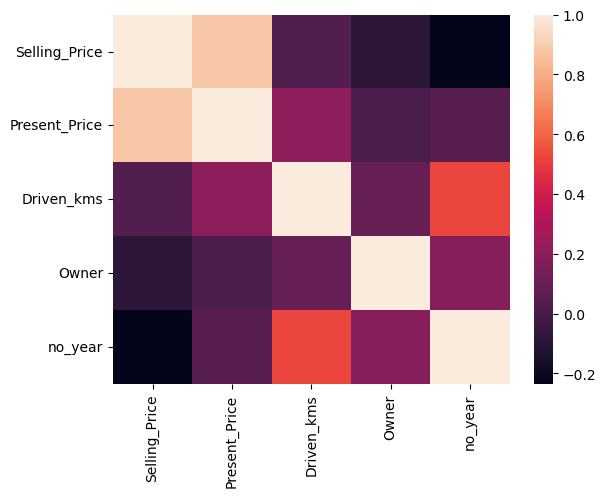

In [18]:
#correlation between features 
numeric_data = data.select_dtypes(include=[np.number])
sns.heatmap(numeric_data.corr())
plt.show()

In [19]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200,num = 12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num = 6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf  = [1,2,5,10]
grid = {'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf}
print(grid)


{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [20]:
from sklearn.model_selection import train_test_split    #importing train test split module
x = data.iloc[:,1:]
y = data.iloc[:,0]
x_train, x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size=0.2)

In [21]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestRegressor() 
hyp = RandomizedSearchCV(estimator = model,
                        param_distributions=grid,
                        n_iter=10,
                       scoring= 'neg_mean_squared_error',
                        cv=5,verbose = 2,
                        random_state = 42,n_jobs = 1) 
hyp.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\NAKSHI MILAN SHAH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\NAKSHI MILAN SHAH\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\NAKSHI MILAN SHAH\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\NAKSHI MILAN SHAH\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  F

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [22]:
y_pred = hyp.predict(x_test)
y_pred

array([ 6.70485,  0.83986,  4.74765,  8.38166, 14.72519,  5.1218 ,
        3.25431,  0.57157,  3.6778 ,  4.7302 ,  2.70081,  0.75477,
        4.97084,  7.30376,  7.78857, 15.00848,  6.70896,  4.21908,
        0.62799,  1.44108,  3.155  ,  5.04875,  5.1891 , 10.01805,
        0.38273,  0.78198,  0.85914,  0.66644,  0.51541,  4.37708,
        2.57446,  5.83575,  0.57042,  6.98101,  3.50125,  1.61354,
        5.68235,  5.62648,  0.30478,  7.55275,  7.0886 , 19.98932,
        4.74465,  4.32663,  5.7252 ,  9.78834,  0.43422,  1.35028,
        5.2679 ,  6.40523,  6.61903,  3.1798 ,  5.35975, 22.9844 ,
        1.08196,  1.17714,  0.54945,  2.51802,  3.5928 ,  2.46191,
        3.72088])